### Problem Statement:<hr>

<p>As of <b>29th July 2020, I interviewed with Solina Group (SCIDaR)</b> and I was assigned the task of using a machine model to forecast/predict the spread of covid-19 in Nigeria. The task is to be delivered within five days.

On July 29th 2020, the total confirmed cases of Covid-19 in Nigeria is 41804 cases. Thus, the question that we need to answer in this case is:

<b>Can we use a machine model to predict or forecast the spread of Covid 19 in Nigeria? If we can, what is the degree of accuracy of such model predictions and limitations of such if any. What can be done to improve the accuracy of such model</b></p>


### Goal: <hr>
We need a strong model that predicts how the Covid-19 could spread in Nigeria. The goal of this task is to build different machine learning models that predict the spread of the virus in Nigeria in the nearest future like in 7 days time, one month time etc



### Objectives/Tasks to be performed:<hr>

<li>Analysing the present condititon of Corona Virus in differents states of Nigeria</li>
<br>
<li>Data visualization of the spread of the covid-19 in Nigeria(including all the 36 states and FCT) since corona virus entered Nigeria</li>
<br>
<li>Is the Covid-19 spread trend in Nigeria similar to that of other countries' trend using China, USA, South Korea as a case study</li>
<br>
<li>Data visualization of the trend of Covid-19 in Nigeria and four other countries (USA, China and South Korea)</li>
<br>
<li>Developing different Machine learning models and comparing their effectiveness in the prediction</li>
<br>
<li>Predicting the Corona virus spread with the different developed machine learning models</li>
<br>
<li>Forecasting the Nigeria's Covid-19 cases using Prophet based model in 7 days (a week) time</li>

<hr>

### Data Analysis and Data Visualization of the Covid-19 Cases

In [2]:
# importing the required libraries for the machine learning models and data visualisation

import pandas as pd #library for manipulating the data in python

#importing the libraries for data visualisation

import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=17,8 #setting the default width and height of all the graph to be plotted as 17 and 8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
pyo.init_notebook_mode(connected=True)
cf.go_offline()
import folium     #library for plotting map
from folium import plugins


#turning off python built in warnings
import warnings
warnings.filterwarnings('ignore')

#### <i> Reading the datasets for the Analysis. I have datasets for covid 19 in Nigeria and that of the whole world gotten from NCDC website and world heath org website. I will need to read this datasets from the xlsx and csv format into pandas dataframe for easy analysis. This is as shown below </i>

In [3]:
# Reading the datasets for Nigeria covid-19 cases as from the day covid-19 case was confirmed in Nigeria
file1 = "covid cases in nigeria.xlsx" # This dataset is at July 29 2020
data1 = pd.read_excel(file1)
data_nigeria = data1.copy()
data1

,S. No.,Name of State,Total Confirmed cases,Cured,Death
0,1,Lagos,14848,2129,192
1,2,FCT,3560,1077,41
2,3,OYO,2668,1187,27
3,4,EDO,2212,1584,79
4,5,RIVERS,1691,1373,52
5,6,KANO,1566,1258,53
6,7,DELTA,1483,1257,42
7,8,KADUNA,1390,1076,12
8,9,OGUN,1326,1068,23
9,10,ONDO,1108,548,22


In [4]:
# Reading the dataset for Nigeria States coordinate for map plotting and visualisation later

file2 = 'Nigeria state cordinates.xlsx'
Nig_cord = pd.read_excel(file2)
Nig_cord.head()

# reading dataset of four countries including Nigeria for per day daily rise in covid-19 
#for comparism purpose to help in the model

daily_nig = pd.read_excel('per day case nigeria.xlsx') # Nigeria data of total cases and confirmed cases daily
daily_china = pd.read_excel('per day case china.xlsx') # China data of total cases and confirmed cases daily
daily_skorea = pd.read_excel('per day case south_korea.xlsx')  # South Korea data of total cases and confirmed cases daily
daily_usa = pd.read_excel('per day case usa.xlsx')  # USA data of total cases and confirmed cases daily
daily_nig.tail() # printing the last 5 rows of Nigeria's data

,date,total_cases,new_cases
196,2020-07-25,39539,591
197,2020-07-26,39977,438
198,2020-07-27,40532,555
199,2020-07-28,41180,648
200,2020-07-29,41804,624


<b><p> Analysing the Nigeria Covid 19 dataset already read into the dataframe 'data1'. This analysis is to get the overview of the data and get some insights about the covid-19 cases in Nigeria so far. This need to be done before proposing model for this data using machine learning model. In other words, I will carry out little data analysis and data visualization before proposing a machine learning model for this data. Follow me through </p></b>

In [5]:
# I will drop the the S/N Column in the Nigeria Data.(little data cleaning)

data1.drop(['S. No.'],axis=1,inplace=True)
data1.head()

,Name of State,Total Confirmed cases,Cured,Death
0,Lagos,14848,2129,192
1,FCT,3560,1077,41
2,OYO,2668,1187,27
3,EDO,2212,1584,79
4,RIVERS,1691,1373,52


In [6]:
# first analysis: getting the total number of cases in Nigeria today(sum of the total cases across the states and FCT)
sum_total_cases = data1['Total Confirmed cases'].sum()
print("The total number of confirmed cases in Nigeria as of 29th July 2020  = ", sum_total_cases)
sum_cured_cases = data1['Cured'].sum()
print("The total number of cured cases in Nigeria as of 29th July 2020  = ", sum_cured_cases)
sum_death_cases = data1['Death'].sum()
print("The total number of death cases in Nigeria as of 29th July 2020  = ", sum_death_cases)


The total number of confirmed cases in Nigeria as of 29th July 2020  =  41804
The total number of cured cases in Nigeria as of 29th July 2020  =  18764
The total number of death cases in Nigeria as of 29th July 2020  =  868


In [7]:
# I will highlight the dataset to get more insight on the Nigeria covid 19 cases

data1.style.background_gradient(cmap = 'Reds')  

#  The darker the color graient (red), the higher the total number of confirmed cases in the state

,Name of State,Total Confirmed cases,Cured,Death
0,Lagos,14848,2129,192
1,FCT,3560,1077,41
2,OYO,2668,1187,27
3,EDO,2212,1584,79
4,RIVERS,1691,1373,52
5,KANO,1566,1258,53
6,DELTA,1483,1257,42
7,KADUNA,1390,1076,12
8,OGUN,1326,1068,23
9,ONDO,1108,548,22


In [8]:
# Now I will get the total number of active cases in each of the state in Nigeria by creating an additional column
# in the data set as shown below

data1['Total Active Cases'] = data1['Total Confirmed cases'] - (data1['Cured'] - data1['Death'])
data1

,Name of State,Total Confirmed cases,Cured,Death,Total Active Cases
0,Lagos,14848,2129,192,12911
1,FCT,3560,1077,41,2524
2,OYO,2668,1187,27,1508
3,EDO,2212,1584,79,707
4,RIVERS,1691,1373,52,370
5,KANO,1566,1258,53,361
6,DELTA,1483,1257,42,268
7,KADUNA,1390,1076,12,326
8,OGUN,1326,1068,23,281
9,ONDO,1108,548,22,582


In [9]:
#getting the total active cases in Nigeria
total_active_cases = data1['Total Active Cases'].sum()
print("The total number of active cases in Nigeria as of the  date (29th July 2020) = ",total_active_cases)

The total number of active cases in Nigeria as of the  date (29th July 2020) =  23908


In [10]:
# Lets see how each of the states varies based on their number of active cases as shown below

total_cases = data1.groupby('Name of State')['Total Active Cases'].sum().sort_values(ascending=False).to_frame()
total_cases.style.background_gradient(cmap = 'coolwarm')

,Total Active Cases
Name of State,
Lagos,12911
FCT,2524
OYO,1508
EDO,707
ONDO,582
PLATEAU,566
KWARA,554
RIVERS,370
ENUGU,362


#### Lets visualize this cases in each of the state by plotting a map for the 36 states including FCT by using the folium map as shown below

In [11]:
# lets merge the Nigeria coordinate data I imported before with the Nigeria covid 19 case data we have been making use of.

# Now using the folium map to plot the number of cases for each of the 36 states and FCT, we can see a circle denoting
# the proportion of covid-19 case in Nigeria for all the states. The larger the circle, the more the case in that state.
#click on each of the circle to see the state and the number of cases in the state

complete_data1 = pd.merge(Nig_cord,data1,on='Name of State')
map=folium.Map(location=[9.0820, 8.6753],zoom_start=7)

for lat,long,value, name in zip(complete_data1['Latitude'],complete_data1['Longitude'],complete_data1['Total Active Cases'],complete_data1['Name of State']):
    folium.CircleMarker([lat,long],radius=value*0.1,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)
map


###### Let's Visualize the total confirmed cases, total cured cases and total death cases in each of the state in Nigeria using bar chart as shown by the graphs below.

In [14]:

# Lets visualize the whole dataset using plotly barchart. To see the total cases in each of the state, just hover
# on the bar corresponding to the state for easy visuals

data1.iplot(kind='bar',x='Name of State',y='Total Confirmed cases',
            title='Total cases of Covid-19 in different states Nigeria',xTitle='States in Nigeria',
            yTitle='Total Confirmed Cases',size=20)

In [15]:

# Lets visualize the whole dataset using plotly barchart. To see the total cured cases in each of the state, just hover
# on the bar corresponding to the state for easy visuals

data1.iplot(kind='bar',x='Name of State',y='Cured',
            title='Total Number of Cured Cases of Covid-19 in different states Nigeria',xTitle='States in Nigeria',
            yTitle='Total Cured Cases',colors='green',size=20)

In [13]:

# Lets visualize the whole dataset using plotly barchart. To see the total death cases in each of the state, just hover
# on the bar corresponding to the state for easy visuals

data1.iplot(kind='bar',x='Name of State',y='Death',
            title='Total Death Cases of Covid-19 in different states Nigeria',xTitle='States in Nigeria',
            yTitle='Total Death Cases',colors='red',size=20)

####  Visualizing the daily global rising of covid-19 using four countries including Nigeria as case studies. This will help us to know the trend and the variation of the cases in different countries of the world as compared to Nigeria. Check out below

In [14]:
#using plotly express for the oo visualization

fig = px.bar(daily_nig,x="date",y="total_cases",color="total_cases", title="Daily rising of Covid-19 in Nigeria")
fig.show()
#NOTE: I used Total Cases as color in this case so that the color of the graph will be changing based on the cases
#Just hover on the graph to see the exact case per day in Nigeria

In [15]:
fig = px.scatter(daily_nig,x="date",y="total_cases",color="total_cases",title="Daily rising of Covid-19 in Nigeria:")
fig.show()


#### Now lets check the daily rise of other countries including China, USA, South Korea. The cases in this country are visualized as shown below

In [16]:
#using plotly express for case visualization in China 

fig = px.scatter(daily_china,x="date",y="total_cases",color="total_cases",title="Daily rising of Covid-19 in China:")
fig.show()
#NOTE: I used Total Cases as color in this case so that the color of the graph will be changing based on the cases
#Just hover on the graph to see the exact case per day in China

In [17]:
#using plotly express for case visualization in USA 

fig = px.scatter(daily_usa,x="date",y="total_cases",color="total_cases",title="Daily rising of Covid-19 in USA:")
fig.show()
#NOTE: I used Total Cases as color in this case so that the color of the graph will be changing based on the cases
#Just hover on the graph to see the exact case per day in USA

In [18]:
#using plotly express for case visualization in South Korea

fig = px.scatter(daily_skorea,x="date",y="total_cases",color="total_cases",title="Daily rising of Covid-19 in South Korea:")
fig.show()
#NOTE: I used Total Cases as color in this case so that the color of the graph will be changing based on the cases
#Just hover on the graph to see the exact case per day in South Korea

<p>From the above plots of the cases in the different countries, we can see the trend of daily rise in the Covid-19 cases in each of the countries. While some of the countries had an initial exponential growth in daily rise, daily rise in cases there has started to flatten, Just like in China. Countries like Nigeria from our plots/visuals above are still experiencing exponential daily rise in the Covid-19 cases.
<b>We will look deep into this. Check out the analysis and visuals below</b><P>

### Now, I will compare Nigeria and the 3 other countries side by side via a single plot. This is as shown below. check it out

In [19]:
#lets make subplots for the country Nigeria, USA, China and South Korea as shown below:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2,cols=2,specs=[[{"secondary_y":True},{"secondary_y":True}],
                                     [{"secondary_y":True},{"secondary_y":True}]],
      subplot_titles = ("S. Korea","USA","Nigeria","China"))
fig.add_trace(go.Bar(x=daily_skorea['date'],y=daily_skorea['total_cases'],
                     marker=dict(color=daily_skorea['total_cases'],coloraxis="coloraxis")),1,1)
fig.add_trace(go.Bar(x=daily_usa['date'],y=daily_usa['total_cases'],
                     marker=dict(color=daily_usa['total_cases'],coloraxis="coloraxis")),1,2)
fig.add_trace(go.Bar(x=daily_nig['date'],y=daily_nig['total_cases'],
                     marker=dict(color=daily_nig['total_cases'],coloraxis="coloraxis")),2,1)
fig.add_trace(go.Bar(x=daily_china['date'],y=daily_china['total_cases'],
                     marker=dict(color=daily_usa['total_cases'],coloraxis="coloraxis")),2,2)
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases of Covid-19 in Nigeria, USA, South Korea and China")
fig.update_layout(plot_bgcolor='rgb(230,230,230)')

# Just hover on each of the graph to see the daily total cases in each of the countries for easy comparism

In [20]:
# creating scatter diagram subplots for the 4 different countries

fig = make_subplots(rows=2,cols=2,specs=[[{"secondary_y":True},{"secondary_y":True}],
                                     [{"secondary_y":True},{"secondary_y":True}]],
      subplot_titles = ("S. Korea","USA","Nigeria","China"))
fig.add_trace(go.Scatter(x=daily_skorea['date'],y=daily_skorea['total_cases'],
                     marker=dict(color=daily_skorea['total_cases'],coloraxis="coloraxis")),1,1)
fig.add_trace(go.Scatter(x=daily_usa['date'],y=daily_usa['total_cases'],
                     marker=dict(color=daily_usa['total_cases'],coloraxis="coloraxis")),1,2)
fig.add_trace(go.Scatter(x=daily_nig['date'],y=daily_nig['total_cases'],
                     marker=dict(color=daily_nig['total_cases'],coloraxis="coloraxis")),2,1)
fig.add_trace(go.Scatter(x=daily_china['date'],y=daily_china['total_cases'],
                     marker=dict(color=daily_china['total_cases'],coloraxis="coloraxis")),2,2)
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text=" Scatter Plot for Total Cases of Covid-19 in 4 countries")
fig.update_layout(plot_bgcolor='rgb(230,230,230)')

#### Having visually observed the covid 19 daily rise trend in Nigeria and 3 other countries as shown above, the question is, can we make any visual inference about the daily rise in covid 19 in these different countries and Nigeria?

##### Are the trends  similar in pattern?

## Visual Inference of the daily rising of covid 19 in the four countries

#### 1. The daily rising of covid 19 in Nigeria is exponential with no definite pattern of increment. This might be due to minimal test carry out in Nigeria for covid 19. Thus visually, we can't predict a definite sequence of daily increment of covid 19 in Nigeria as of present as it keeps increasing exponentially though we can see that there is always high daily rise of cases.

#### 2. Confirmed cases in South Korea is rising gradually unlike Nigeria that is rising exponentially. In South Korea, the daily rise is no longer increasing exponentially unlike their daily rise during the period of March and April. They might have been observing the necessary prevention techniques of fighting this virus since the month of April.

#### 3. China has almost controlled the virus as the visually observed cases in China has reached a flatten region. The curve is almost flatten.  This might be because of the different techniques that Chaina deployed to fight this virus including deploying aritficial intelligence in their testing for covid case and many more.

#### 4. covid 19 case in USA is now rising gradually after they had exponential daily rise during the month of March to ending of May as can be seen from the plots. The case is now rising gradually. 

<hr>

#### <i>From our data visualization of the daily rising of the Covid 19 cases in Nigeria and the other countries, we can see how the cases of the Covid 19 has been rising in the past but we can't actually predict or forecast the number of cases in the future with only the data visualisation. Thus, there is a need for machine learning model that can predict the cases even with a small degree of accuracy or higer degree of accuracy. Now, we will consider some machine learning models below </i>

<hr>

##  Machine Models

### Developing a Machine Model for predicting the Covid 19 cases in Nigeria

#### We will deploy different machine model algorithms like linear regression model, polyregression model, fbprophet based model etc for our prediction and compare and contrast these models to know the one that can predict with a higher degree of accuracy

### Linear Regression Model

In [21]:
#using Linear Rigression model to predict the total case
daily_nig # Nigeria daily case data


,date,total_cases,new_cases
0,2019-12-31,0,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,0,0
4,2020-01-04,0,0
...,...,...,...
196,2020-07-25,39539,591
197,2020-07-26,39977,438
198,2020-07-27,40532,555
199,2020-07-28,41180,648


In [22]:
from sklearn.model_selection import train_test_split #importing the module for training and testing the model

#now converting the date string in our data to datetime
import datetime as dt
daily_nig['date'] = pd.to_datetime(daily_nig['date'])
daily_nig.head()

,date,total_cases,new_cases
0,2019-12-31,0,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,0,0
4,2020-01-04,0,0


In [23]:
# Now converting the datetime column in our data now to ordinal form for the model prediction
daily_nig['date'] = daily_nig['date'].map(dt.datetime.toordinal)
daily_nig.head()

,date,total_cases,new_cases
0,737424,0,0
1,737425,0,0
2,737426,0,0
3,737427,0,0
4,737428,0,0


In [24]:
# Now, from our Nig covid data, I will use the date and total_cases as dependent variable and independent variable
x = daily_nig['date']
y = daily_nig['total_cases']

In [25]:
# Now getting our training and testing data for the machine model prediction from our data using the train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [26]:
# Now we will first make use of machine model known as linear regression for the prediction

from sklearn.linear_model import LinearRegression
linearReg = LinearRegression()

In [27]:
# Now lets train our model, LinearReg using the training data(x_train and y_train) from our dataset
import numpy as np
linearReg.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1)) #fitting and training the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
daily_nig.tail() # the last 5 rows of our data

,date,total_cases,new_cases
196,737631,39539,591
197,737632,39977,438
198,737633,40532,555
199,737634,41180,648
200,737635,41804,624


In [29]:
# Now. lets predict with our model

y_predict = linearReg.predict(np.array(x_test).reshape(-1,1)) # We are using the test data to predict our model in an array


# lets now compare the predicted value using the linearReg and the true value of the target we got by splitting the data as:

print("The 1st five predicted values of covid 19 in Nigeria using the linear model  are: ",y_predict[0:5])
print("The 1st five expected values of covid 19 in Nigeria are: ",y_test[0:5].values)

The 1st five predicted values of covid 19 in Nigeria using the linear model  are:  [[ 9408.11295083]
 [ 4478.19549188]
 [18417.96209994]
 [19097.95071496]
 [14508.02756353]]
The 1st five expected values of covid 19 in Nigeria are:  [  665    30 15181 17148  6677]


In [30]:
# Lets get the mean-squared-error which we will use to check the accuracy of our prediction

from sklearn.metrics import mean_squared_error

mean_error = mean_squared_error(x_test,y_predict)
print("The mean squared error for our linear regression model is: ",mean_error)

# huh! the mean_squared error is very high, meaning that the model is not that accurate in the prediction

The mean squared error for our linear regression model is:  532218626716.5626


In [31]:
# Now, lets predict the total case of a known date with our model to know if it can predict very well

# I am going to predict the total test case on July 29th 2020. On July 29th, Nigeria recorded total number of 41804 cases.

# I want to use our train regression model to know if we can get the figure by predicting it with our model


linearReg.predict(np.array([[737635]]))

# we can see that our model predicted about 26237 cases on July 29th 2020 but the actual case on July 29th was 41804 cases
# Thus our model is predicting but not that accurate.

array([[26237.83117275]])

#### Now, the question, why is our model failing to predict with high degree of accuracy?. The answer is:
<i> Machine learning model algorithm known as linear rigression model was used for this prediction. It only requires two variables for prediction. In this case I used the variable date and total cases per day for training the model. The linear regression model works well if we can train the model with sufficient data like hundreds of thousands of dataset. The current data we have in Nigeria for covid 19 is not that sufficient enough to train this model to predict with high degree of accuracy. In this case, our linear regression model was only trained with data of 201 rows not even up to a thousand row. Thus the training and testing data for this model is very small for the model to learn and predict with high degree of accuracy. Thus, linear regression model is not an accurate model for this prediction. Thus, we can make use of other machine learning model like multiple linear regression, polynomial regression etc</i>

## Simple Linear Regression Model
#### Now, using ordinary simple linear regression model without using the train_test_split function as we did above and try to predict the model using only the variabel date (ordinal) and total cases as shown below

In [32]:
#importing the linear regression module as follows:

from sklearn.linear_model import LinearRegression

#creating the linear regression object as follows
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
X = daily_nig[['date']]
Y = daily_nig['total_cases']
lm.fit(X,Y)  # fitting the linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
yhat = lm.predict(X) #predicting the cases using the simple linear regression model
yhat[0:5]   #first five predicted cases using the model



array([-9089.71298237, -8927.64588191, -8765.57878144, -8603.51168098,
       -8441.44458051])

In [35]:
#getting the intercept for the model here:
lm.intercept_

-119521259.20652996

In [36]:
#getting the slope/coefficient for the model here:
lm.coef_

array([162.06710047])

In [37]:
#fitting the intercept and the slope obtained above in the model equation as yhat = a + bx as shown below:

# yhat = -119521259.20652996 + 162.06710047*date(ordinal)

### Our linear regression model equation is given as shown below

#### yhat = -119521259.20652996 + 162.06710047 * date(ordinal)

##### where yhat means the predicted number of total cases in a given day and date ordinal means the date of the day converted to ordinal value

### Model Evaluation using Visualization

#### since we have developed machine model (linear regression model), one of the ways to determine the best of the model is by using data visualization techniques


In [38]:
#importing visualization packages as shown below
import seaborn as sns
%matplotlib inline

(0.0, 44545.45646558212)

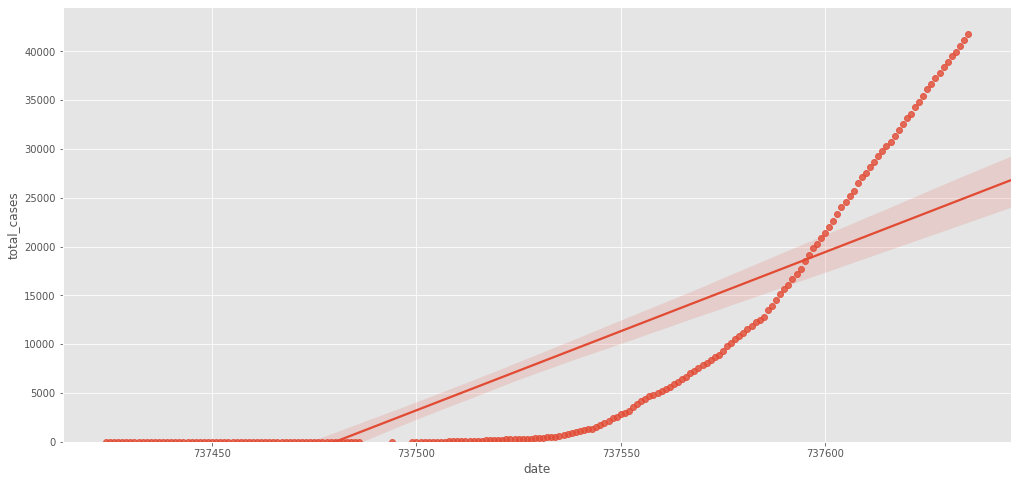

In [39]:
# when visualizing simple regression model, the best visuallizing method is by using of regplot
#lets visualize the date ordinal parameter on the total number of cases
width = 17
height = 8
plt.figure(figsize=(width,height))
sns.regplot(x="date",y="total_cases",data=daily_nig)
plt.ylim(0,)

#### <i> from the figure above, we can see that the predictor variable, total test cases is positively correlated with the date (ordinal) but it is not fitting the points well. In fact, it is not tracing and matching the points well. Thus, visually, we can say that simple linear regression model is not suitable for modelling the covid 19 cases in Nigeria to predict the total number of confirmed cases.</i>

In [40]:
#lets verify the correlation of the date_ordianl, and the total number of cases as shown below

corr_df = daily_nig[['date','total_cases']]
corr_df.corr()

,date,total_cases
date,1.000000,0.824617
total_cases,0.824617,1.000000


#### from the numeric correlation evaluation above, we can see that the correlation between the days(date ordinal) and total number of cases is strongly correlated (0.824617)

#  Residual Plots

### Residual plot is a graph showing the residue on the y-axis and the predictor variable on the x-axis. Residue is the difference between the observed values and the actual values

#### what to note in the residual plot: If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data

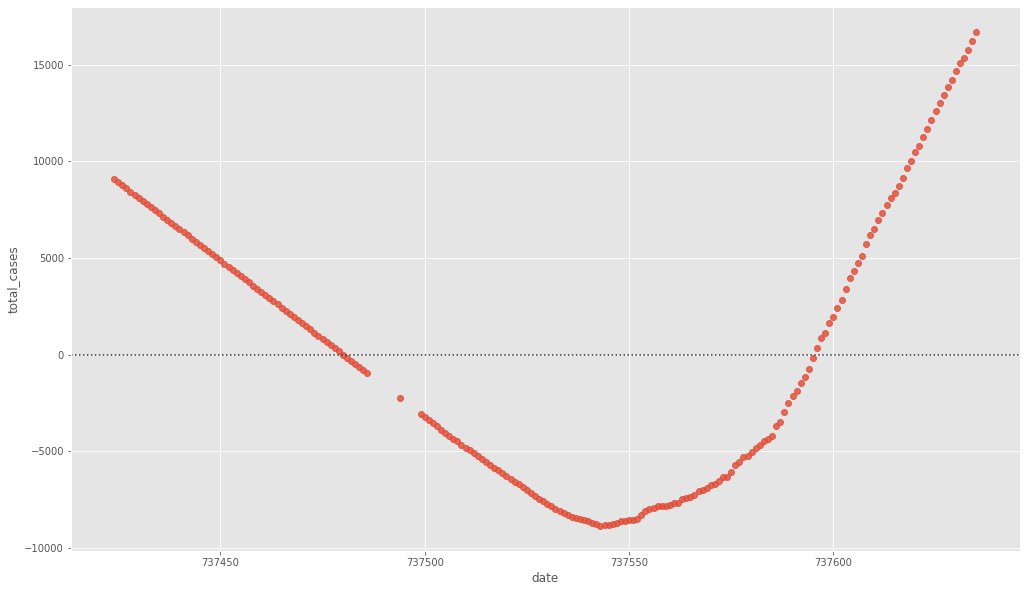

In [41]:
#lets plot a residual plot for the date and the total cases linear regression model we developed before as:

width = 17
height = 10
plt.figure(figsize=(width,height))
sns.residplot(x="date",y="total_cases",data=daily_nig)
plt.show()

 <b><i> our deduction from the residual plot above: From the figure we can see that the residues are not radomly distributed around the x-axis and this shows to us that ordinary linear model is not ideal for this modelling even though our numerical correlation evaluation suggested to us that the model was cool before but with residual plot we just plotted, we have to overrule that previous assumption. Thus, in this case, it simply means that a non-linear model maybe more appropriate than the linear model.  This will now make us to develop a non linear model between the date and the total number of cases</i></b>

# Polynomial Regression Machine Learning Model

######  This is a particular case of the general linear regression model or multiple linear regression models. We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

####  We saw earlier that a linear model did not provide the best fit while using date as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead. This is shown below


In [42]:
# Now lets generate a higher degree polynomial for the date as shown below:

x = daily_nig['date']
y = daily_nig['total_cases']
f = np.polyfit(x ,y, 3)
p = np.poly1d(f)
print(p)



         3             2
0.01082 x - 2.395e+04 x + 1.766e+10 x - 4.341e+15


### The polynomial Regression model equation is  given as:

In [43]:
print("yhat = ",p)

yhat =           3             2
0.01082 x - 2.395e+04 x + 1.766e+10 x - 4.341e+15


#### <i> yhat  is the predictable number of total cases in a given day and x is the date in ordinal form</i>

In [74]:
# Lets create a function that will plot the graph of our generated 3rd degree polynomial as shown below:

def polynomial_plot(poly_model,predictor,target,name):
    new_x = np.linspace(15, 55, 100)
    new_y = poly_model(x)
    plt.plot(predictor, target,'.',x,new_y,'-')
    plt.title("Total Cases Relationship with respect to date(Ordinal) in Nigeria")
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
#     fig = plt.gcf()
    plt.xlabel(name)
    plt.ylabel("Total Cases")
    plt.show()
    plt.close()

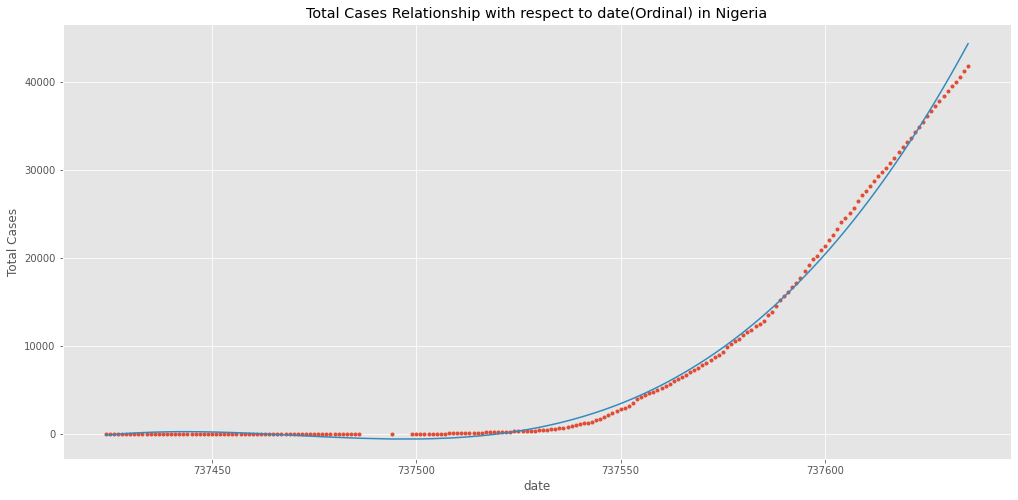

In [75]:
polynomial_plot(p,x,y,'date')

#### <i>Deduction from the polyplot shown: We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points and it fits well than that of liner regression model we considered before</i>.

# Measure of In-Sample Evaluation

<b> <i> Let's use some parameters to verify the accuracy of our model: The linear regression model and the poly regression model we have designed for the data as shown below</i>  </b>

##### This can be done using the Rsquare or mean-square approach method

### Testing the accuracy of our Linear Regression model

### Rsquare Value of the Linear Model

In [76]:
# calculating the Rsquare for our linear regression model as shown below

lm.fit(X,Y)
print("The Rsquare of the linear regression model is: ",lm.score(X,Y))

The Rsquare of the linear regression model is:  0.6799939155351067


#### <i>The above Rsquare value suggest that only 67.999% by the simple linear model of the date with respect to the total number of cases</i>

### Mean Squared Error of the Linear Model

In [77]:
# calculating the mean squared error of our linear regression model as shown below

predicted_valueof_y = lm.predict(X)
mse = mean_squared_error(daily_nig['total_cases'],predicted_valueof_y)
print("The mean squared error of the linear regression model is: ",mse)

The mean squared error of the linear regression model is:  47834789.94027429


# Decision Making: Determining a Good Model Fit
##### Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

#### What is a good R-squared value?
##### When comparing models, the model with the higher R-squared value is a better fit for the data.

#### What is a good MSE?
##### When comparing models, the model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models.
Simple Linear Regression: Using date (ordinal) as a Predictor Variable of total number of cases.

R-squared: 0.6799939155351067
MSE: 4.78 x10^8 

Polynomial Fit: Using date(ordinal) as a Predictor Variable of total cases.

R-squared:  0.6799939155351067
MSE: 2.05 x 10^7
Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)
We would have used the multiple linear regression model in this case but no sufficent data with various variables of covid 19 in Nigeria.
Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, one should always check the MSE and R^2.


Simple Linear Model (SLR) vs Polynomial Fit
MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
R-squared: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting total number of covid cases in Nigeria with date (ordinal) as a predictor variable.


# Model Evaluation Of Our Predicted Models

let's train and test our predicted models which include the linear regression model and the poly regression model to observe their predicting behaviour

### Training and Testing of our model
##### This is an important part of model evaluation. In this case, we split the data into training and testing parts to test our model

In [48]:
# lets place our target variable('total cases' in this case) in a separate frame as shown below
target_data = daily_nig['total_cases']

In [49]:
#lets get the predictor variables by droppig the target variable(total cases) from our data frame, df as shown below:

predictor_data = daily_nig.drop('total_cases',axis=1)


### Lets split our data randomly into training and testing using the test_train_split as shown below

In [50]:
# first import the train_test_split library as:
from sklearn.model_selection import train_test_split

In [51]:
# now, we split using the train_test as below:
xtrain,xtest,ytrain,ytest = train_test_split(predictor_data,target_data,test_size = 0.15,random_state = 1)
print("The number of test samples is :", xtest.shape[0])
print("The number of train samples is: ",xtrain.shape[0])
 #The test_size parameter sets the proportion of data that is split into the testing set. 
 # In the above, the testing set is set to 15% of the total dataset.

The number of test samples is : 31
The number of train samples is:  170


In [52]:
#lets train our linear regression model as shown below:

#fit the model with the lr model we have developed before (lm) using the 'date (ordinal)' predictor variable as shown below
lm.fit(xtrain[['date']],ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
#calculating the root mean square for the test data as shown below

r1 = lm.score(xtest[['date']],ytest)
print("The R^2 for the test data is :", r1)

The R^2 for the test data is : 0.7163925253072791


In [54]:
#calculating the root mean square for the train data as shown below:

r2 = lm.score(xtrain[['date']],ytrain)
print("The R^2 for the train data is: ",r2)

The R^2 for the train data is:  0.67249816646504


#### <i> After splitting our data set to evaluate and test the model, we saw that the training data is very small 170 and the number of test data for the model also very small. This will affect our model severly. </i>

### POLYNOMIAL REGRESSION

In [55]:
from sklearn.preprocessing import PolynomialFeatures

### Overfitting
Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 3 polynomial model.

In [56]:
# now, we split our data using the train_test as below:
x_train, x_test, y_train, y_test = train_test_split(predictor_data, target_data, test_size=0.45, random_state=0)

In [57]:
# lets perform a degree 3 polynomial transformation on the predictor variable date (ordinal) as shown below

pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(x_train[['date']])
x_test_pr = pr.fit_transform(x_test[['date']])
pr

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [58]:
# Now let's create a linear regression model "poly" and train it with our poly transform data
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# lets predict using the poly model we just created
poly_predict = poly.predict(x_test_pr)
poly_predict[0:5]


array([  909.50872803, 24251.29718018,  3021.246521  ,  1244.20452881,
       27559.87811279])

In [78]:
# lets now compare the predicted value using the polymodel and the expected value of the target we got by splitting the data as:

print("The 1st five predicted values of covid 19 in Nigeria are: ",poly_predict[0:5])
print("The 1st five expected values of covid 19 in Nigeria are: ",y_test[0:5].values)

The 1st five predicted values of covid 19 in Nigeria are:  [  909.50872803 24251.29718018  3021.246521    1244.20452881
 27559.87811279]
The 1st five expected values of covid 19 in Nigeria are:  [    0 24567  1273   493 28711]


In [61]:
# Lets find the R^2 for that of the training data and that of the test data as shown below:
Rtrain = poly.score(x_train_pr,y_train)
Rtest = poly.score(x_test_pr,y_test)
print("The R^2 for the training data is: ",Rtrain)
print("The R^2 for the test data is: ",Rtest)

The R^2 for the training data is:  0.9761896680455735
The R^2 for the test data is:  0.9654391394966666


 <p>We see the R^2 for the training data is 0.9761896680455735 while the R^2 on the test data was 0.9654391394966666. The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.</p>

####  Lets see how the R^2 changes for the test data for different order of the polynomials and then plot them to see the variation

In [79]:
Rsqu_test_value = []
poly_order = [1,2,3,4,5,6,7,8]
for n in poly_order:
    poly_obj = PolynomialFeatures(degree = n)
    xtrain_pr_all = poly_obj.fit_transform(x_train[['date']])
    xtest_pr_all = poly_obj.fit_transform(x_test[['date']])
    poly_model = LinearRegression()
    poly_model.fit(xtrain_pr_all,y_train)
    Rsqu_test_value.append(poly_model.score(xtest_pr_all,y_test))
print("The R^2 values of different polynomial degree of the regression model = ",Rsqu_test_value)

The R^2 values of different polynomial degree of the regression model =  [0.6489072460303799, 0.965429180561226, 0.9654391394966666, 0.9654489729768484, 0.9654587980403475, 0.9654686255615033, 0.965478449163882, 0.9654882717812145]


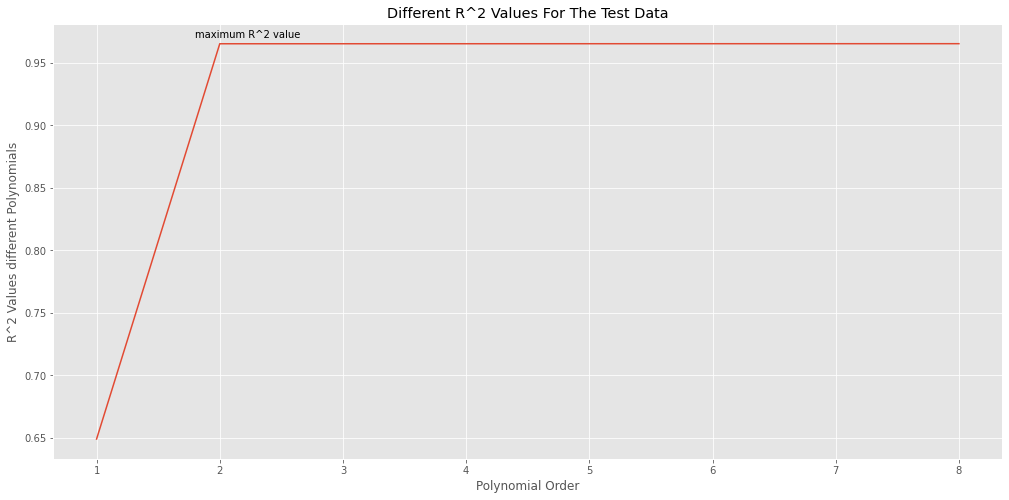

In [84]:
#now lets plot the various R^2 of the different polynomials with respect to the orders

plt.plot(poly_order, Rsqu_test_value)
plt.xlabel("Polynomial Order")
plt.ylabel("R^2 Values different Polynomials")
ax = plt.gca()
ax.set_facecolor((0.898,0.898,0.898))
plt.title("Different R^2 Values For The Test Data")
plt.text(1.8,0.97,"maximum R^2 value")
plt.show()
plt.close()

###### We see the R^2 gradually increases until an order two polynomial is used. Then the R^2 starts to become uniform from the order three.

In [85]:
# Lets plot the data generated using the poly regression model and see how it can vary. In this plot, the predicted number of
# cases will be shown in blue while the actual value will be shown in red.

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 17
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Predicting variable')
    plt.ylabel('Total Number of cases')

    plt.show()
    plt.close()

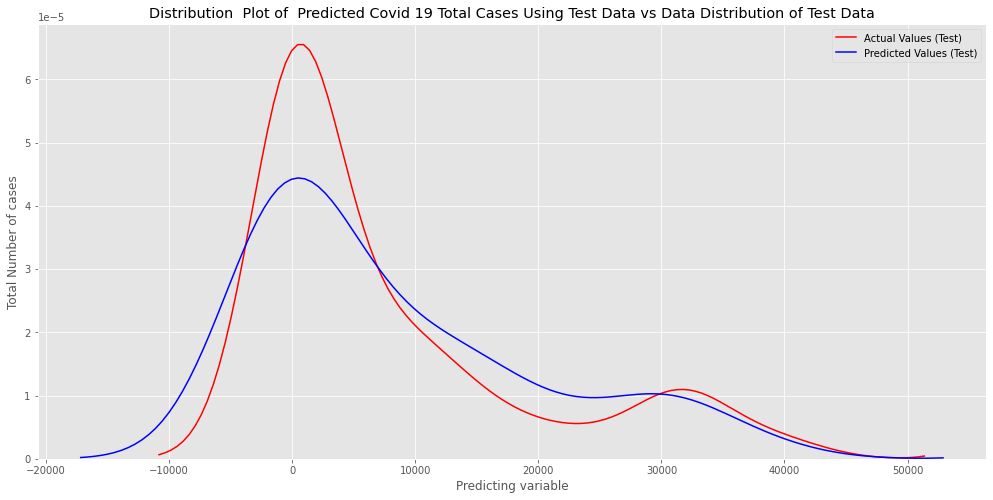

In [86]:

# Now lets plot using the distribution plot that we once created before.
# Title = "Distribution plot of the predicted versus the actual using polynomial regression"
# distribution_plot(y_test,y_predict1,"Actual Data values","Predicted Data Values",Title)
Title='Distribution  Plot of  Predicted Covid 19 Total Cases Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, poly_predict, "Actual Values (Test)", "Predicted Values (Test)", Title)

<p>The predicted value is lower than actual value for covid 19 total cases in Nigeria at the initial stage, that is from the ordinal date of 0 to the ordinal date of about 9000, conversely the predicted total cases is higher than the actual value of toal cases in the range of ordinal date 9, 000 to 30,000 range. As such the model is not as accurate in these ranges .</p>

## Fbprophet Model

### Lets try forcasting/predicting the covid case using the fbprophet model

In [26]:
from fbprophet import Prophet   #importing the fbprophet base model module

In [27]:
file2 = "nigeria covid 19 data.xlsx" # This dataset is at July 29 2020
df = pd.read_excel(file2)
df

,i+A1:Y2605so_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,NGA,Africa,Nigeria,2019-12-31,0,0,0,0,0.000,0.000,...,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69
1,NGA,Africa,Nigeria,2020-01-01,0,0,0,0,0.000,0.000,...,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69
2,NGA,Africa,Nigeria,2020-01-02,0,0,0,0,0.000,0.000,...,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69
3,NGA,Africa,Nigeria,2020-01-03,0,0,0,0,0.000,0.000,...,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69
4,NGA,Africa,Nigeria,2020-01-04,0,0,0,0,0.000,0.000,...,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,NGA,Africa,Nigeria,2020-07-25,39539,591,845,12,191.807,2.867,...,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69
197,NGA,Africa,Nigeria,2020-07-26,39977,438,856,11,193.932,2.125,...,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69
198,NGA,Africa,Nigeria,2020-07-27,40532,555,858,2,196.624,2.692,...,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69
199,NGA,Africa,Nigeria,2020-07-28,41180,648,860,2,199.768,3.144,...,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69


In [28]:
confirmed = df[['date','total_cases']]
confirmed.head()

,date,total_cases
0,2019-12-31,0
1,2020-01-01,0
2,2020-01-02,0
3,2020-01-03,0
4,2020-01-04,0


In [29]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

### Forecasting/Predicting Confirmed Cases in Nigeria with Prophet (Base Model)

#### <i>Generating a week ahead forecast of confirmed cases of COVID-19 using prophet, with 95% prediction interval by creating a base model with not tweaking of seasonality-related parameters and additional regressors</i>

In [30]:
m = Prophet(interval_width = 0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods = 7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
203,2020-08-01
204,2020-08-02
205,2020-08-03
206,2020-08-04
207,2020-08-05


#### <i>The predict method will assign each row in future a predicted value which it names yhat. If we pass in historical date, it will provide an in-sample fit. The forcast object here is a new dataframe that includes a column yhat with the forecast as well as columns for components and uncertainty intervals</i>

In [32]:
# Predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail() #the last five rows of predicted cases by our fbprophet model

# yhat is the predicted case in a given date
# yhat_lower is the least value that our model can predict in a given day with the same degree of accuracy
# yhat_upper is the highest value that our model can predict in a given day with the same degree of accuracy

,ds,yhat,yhat_lower,yhat_upper
203,2020-08-01,43645.260560,43478.347291,43829.873095
204,2020-08-02,44238.156282,44042.660599,44429.748684
205,2020-08-03,44796.405630,44590.589405,45009.854273
206,2020-08-04,45375.175104,45126.386009,45646.882665
207,2020-08-05,45940.242268,45652.467268,46230.222556


### Explanation of the prediction above using fbprophet model

<b><i>I used the fbprophet model to predict the Covid-19 cases in Nigeria in the next one week. The table above shows the predicted cases in Nigeria by our model from August 1st 2020 to August 7th. The model is predicting a total case of 43645 in August 1st and a total case of 45940 in August 5th 2020. As of the time of documenting this report, the total case of Covid 19 in Nigeria is 41804. This particular is predicting with higher degree of accuracy compared to the other models earlier developed for the prediction. Its degree of prediction accuracy is 95%.</i></b>

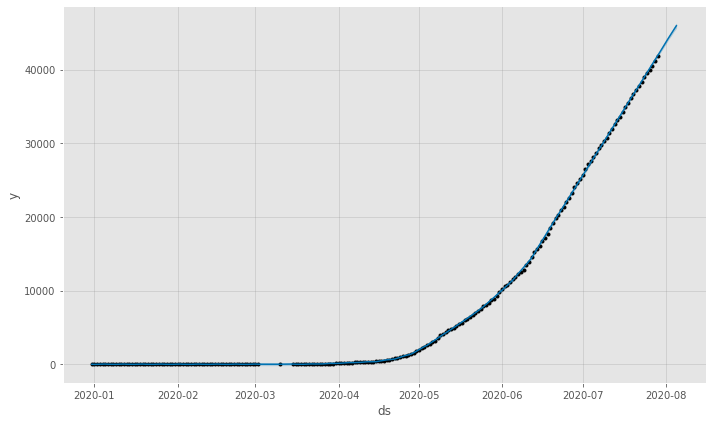

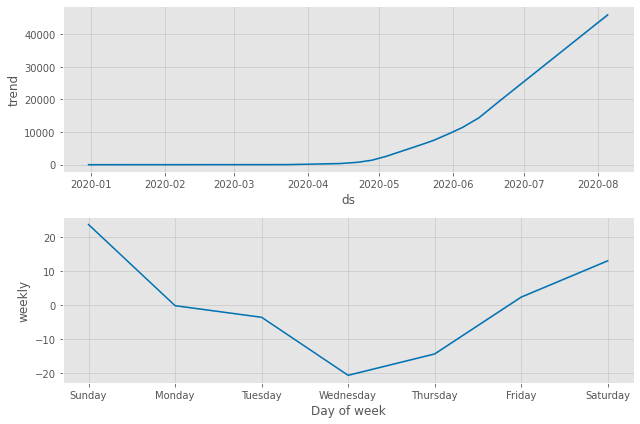

In [87]:
# Let's plot the forecast by calling on the prophet plot method and passing in our forecast dataframe

confirmed_forecast_plot = m.plot(forecast)

confirmed_forecast_plot = m.plot_components(forecast)

### We noted the following from the above forecast graphs/plots:<br>

<li>From the first graph, we can see that the predicted cases is very close to the actual value meaning that our model can predict with a higher degree of accuracy</li>
<li>The second graph suggests the daily rise in Covid 19 in Nigeria since the month of March and its tendency to rise even in the month of August</li>
<li>The third depicts the rise and fall of Covid 19 in Nigeria in some days.</li>

### GENERAL INFERENCE FROM THE ABOVE DATA ANALYSIS, VISUALIZATION AND FORECAST

  <b><i>We Can Generally Deduce the Following:</i></b>
  <li><b>Lagos</b> has the highest number of confirmed cases followed by <b>FCT, Abuja</b> and <b>Oyo</b> state while        <b>Kogi</b> has the least cases</li>
  <li><b>Lagos</b> has the highest proportion of recovered/cured cases followed by <b>Edo</b> and <b>Rivers state</b></li>
  <li><b>Lagos</b> has the highest death rate followed by <b>Edo state</b> and <b>Kano state</b></li>
  <li>Covid-19 cases in Nigeria is rising exponentially with no definite pattern of increment</li>
  <li>Our developed Linear Regression Model for the prediction was predicting and forecasting the future total cases but its degree of prediction was not that high.</li>
  <li>Our developed Poly Regression Model was predicting with more higher accuracy than that of the Linear Regression Model</li>
  <li>Our fbprophet based model was predicting with a very high degree of accuracy compared to that of Linear Regression model and Poly Regression Model</li>
                                        

### Will the covid 19 cases in Nigeria keep on increasing?

<p>Yes. If you look at Nigeria's covid 19 data and its forecast from  our machine models so far, one can say that cases in Nigeria will keep rising unless strict measures against covid 19 are observed by the people.</p>

### SUGGESTIONS/CONCLUSIONS

<p>The present condititon of Corona Virus in differents states of Nigeria was analysed and its spread across the different states visualized.<br> Covid-19 spread trend in Nigeria was compared to that of other countries' trend using China, USA, South Korea as a case study and we saw how the spread in these countries varies.<br>Different Machine learning models were developed and their effectiveness in the prediction of the cases compared<br>Nigeria's Covid-19 case was predicted using Prophet based model in 7 days (a week) time</p><br>
<b>Out of our developed models, the prophet based model (fbprophet) predicted with highest degree of accuracy followed by the poly regression model</b>
<p>We have to note that there are other machine learning models or algorithms that exist like <b>Decision Tree Model</b>,<b>K-Means Clustering Model</b>,<b>Density-Based Clustering Model/Algorithm</b> etc. These ones are not useful in the case of Covid-19 prediction in Nigeria and that is one of the reasons I resorted to the Linear Regression Model, Poly Regression Model and Prophet based model.</p>
<p>Our models didn't predict with a very high degree of accuracy because the Covid-19 data in Nigeria is not sufficient to train our machine learning models to learn and to predict with a very high degree of accuracy. Machine models have to be trained and they predict based on the data they were trained with. The higher the data for the training, the better the accuracy of the prediction of machine learning model. As of the time of working on this task, Nigeria only has 201 data for the Covid-19 and this data is not suffient for the training of our developed machine models.<br>Also, for machine learning model to be trained and learned for higher degree of accuracy in prediction, some data variables need to be incorporated in the training of the model but unfortunately, Nigeria lack this dataset for this machine model training. For instance, there are factors affecting the spread of Covid-19 like the social distancing factors, personal hygiene observed by the people, the number of tesing facilities/kits, early detection of the case and many more. These factors are not considered in the training and testing of our developed machine models since Nigeria lack this data. If all these were considered in our model training and testing, our models would have been predicting the number of cases in Nigeria with a very high degree of accuracy.</p><br>
<p>As Covid-19 case keeps rising exponentially in Nigeria, we all need to fight against this pandemic by observing the necessary precautions like regular washing of hands, social distancing, wearing of face masks in public etc. All these will help to flatten our case curve like that of China now.</p>



## ..............................................THE END..........................................................................

###                                   <i>Analysis and model developed by <b>Ugwu, George Chijioke</b></i>